# Predicting Heart Disease Using ML 

Approach:
1. Problem Defenition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Statement
> Given Clinical parameters about a patient , can we predict whether or not they have heart disease?

## 2. Data
kaggle data: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years
   
2. sex - (1 = male; 0 = female)
   
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
     
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   '>126' mg/dL signals diabetes
   
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
     
8. thalach - maximum heart rate achieved
   
9. exang - exercise induced angina (1 = yes; 0 = no)
    
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    
11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart
     
12. ca - number of major vessels (0-3) colored by flourosopy
   * colored vessel means the doctor can see the blood passing through
   * the more blood movement the better (no clots)
     
13.  thal - thalium stress result
   * 1,3: normal
   * 6: fixed defect: used to be defect but ok now
   * 7: reversable defect: no proper blood movement when excercising
     
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 5. Modelling

In [1]:
!pip install seaborn



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# we want our plot to appear inside notebook
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import RocCurveDisplay 

## Load

In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

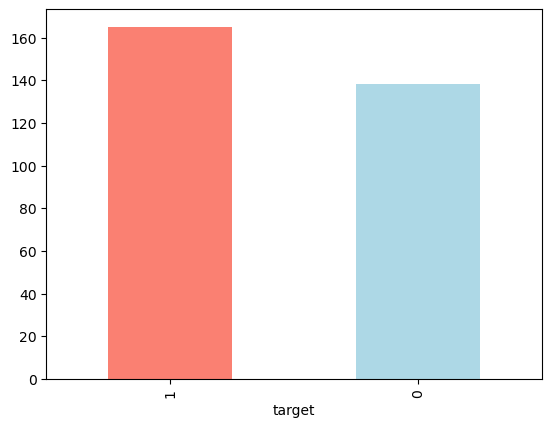

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heary Disease Frequency According to Sex

In [8]:
# Heary Disease Frequency According to Sex

df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


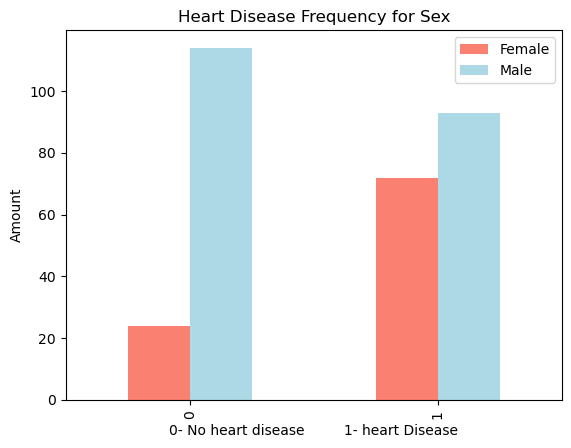

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0- No heart disease         1- heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

## Age VS Max Heart Rate for a Disease

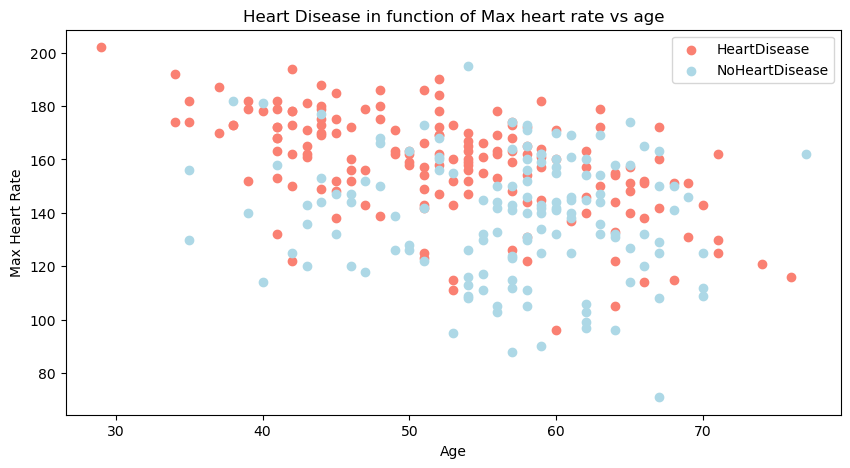

In [11]:
plt.figure(figsize=(10,5))
#scatter with positive
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon");
#scatter with negative
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue");
plt.title("Heart Disease in function of Max heart rate vs age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["HeartDisease","NoHeartDisease"]);

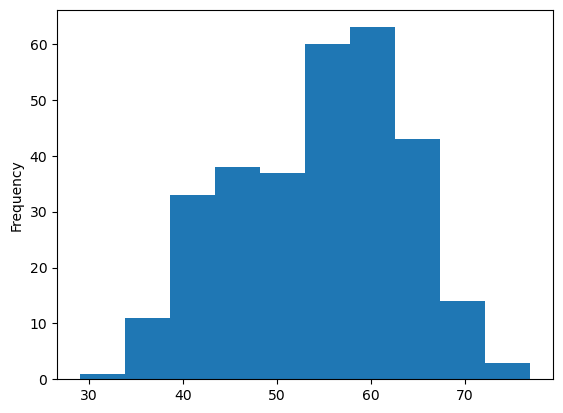

In [12]:
df.age.plot.hist();

## Heart Disease Frquency per chest Pain Type

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of diseas

In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


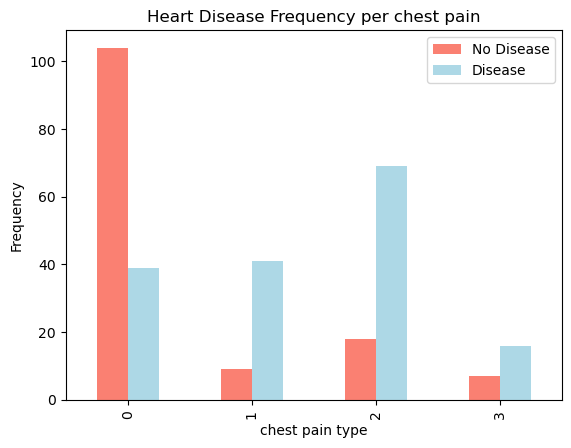

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["salmon","lightblue"])

plt.title("Heart Disease Frequency per chest pain")
plt.xlabel("chest pain type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"]);

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:

corr_matrix = df.corr()

In [17]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


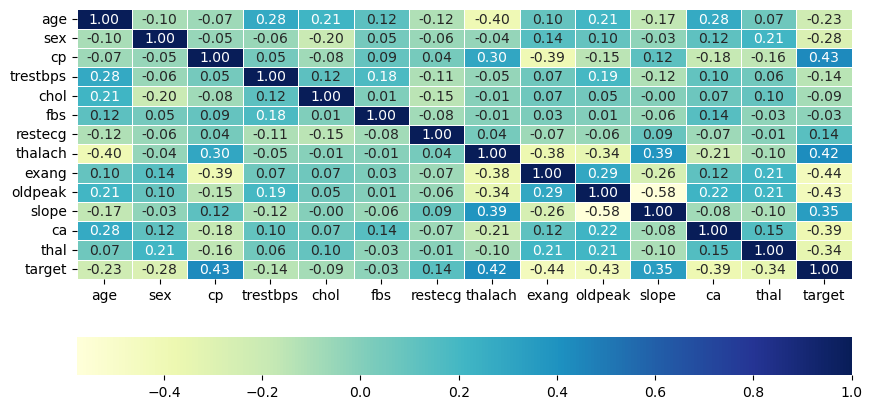

In [18]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu",
              xticklabels=corr_matrix.columns,  # Set x-axis labels to column names
            yticklabels=corr_matrix.columns,  # Set y-axis labels to column names
            cbar_kws={"orientation": "horizontal"})

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x=df.drop("target",axis=1)
y=df["target"]

In [21]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
np.random.seed(7)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


Now we will build our model

We will find pattern on trainig data and use it in testing 
we will try 3 models
1. Logistic Regression
2. RandomForest Classifier
3. KNN Classifier 

In [23]:
models={"Logistic Regression":LogisticRegression(),
        "KNN Classifier":KNeighborsClassifier(),
        "RandomForest Classifer":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(45)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    
        

In [24]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

/Users/prajaktakapoor/Desktop/ml/bulldozer-price-prediction-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7540983606557377,
 'KNN Classifier': 0.5573770491803278,
 'RandomForest Classifer': 0.7377049180327869}

## Model comparison 

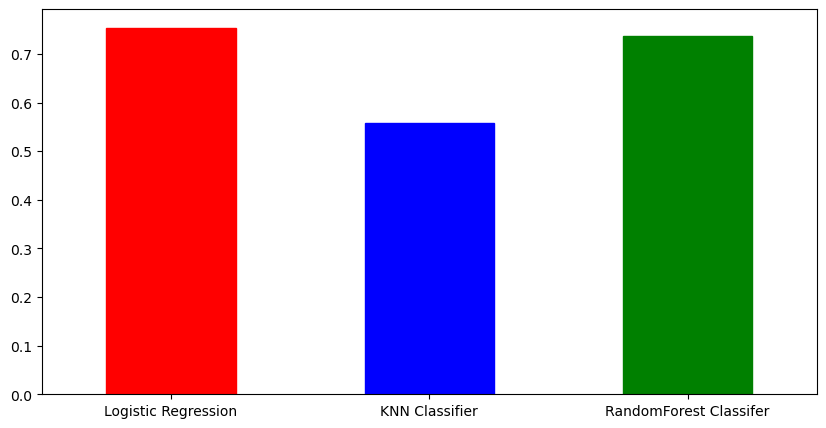

In [25]:

# Specify a list of colors for each model

model_compare = pd.DataFrame(model_scores, index=["accuracy"], columns=models.keys())

# Specify a list of colors for each model
colors = ['red', 'blue', 'green']

# Plot the bar chart
bars = model_compare.T.plot.bar(color=colors, rot=0, figsize=(10, 5))

# Set individual colors for each bar
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)
bars.legend().set_visible(False)

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## HyperParameter Tuning

In [26]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339]

In [28]:
test_scores

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836]

Maximum knn score on test data: 67.21%


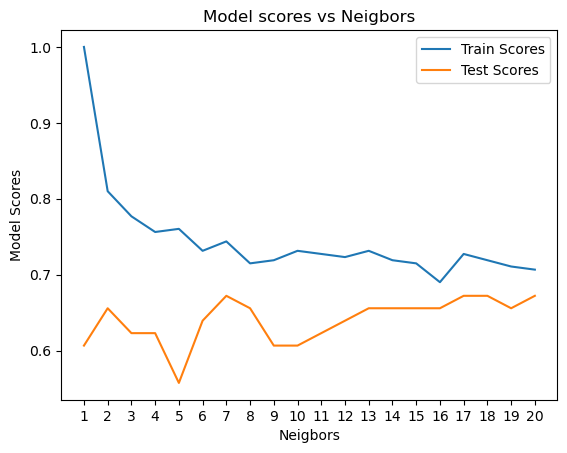

In [29]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.title("Model scores vs Neigbors")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Neigbors")
plt.ylabel("Model Scores")
plt.legend()
print(f"Maximum knn score on test data: {max(test_scores)*100:.2f}%")

## HyperParameter Tuning Using RandomizedSearchCV

In [30]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
rf_grid={ "n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...



In [31]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [33]:
rs_log_reg.score(x_test,y_test)

0.7540983606557377


Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [34]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_rf.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.score(x_test,y_test)

0.7213114754098361

## HYperParameter Tunning using GridSearchCV

In [36]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
    
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(x_test,y_test)

0.7540983606557377

## Evaluating our tuned model beyond accuracy

In [39]:
y_preds=gs_log_reg.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

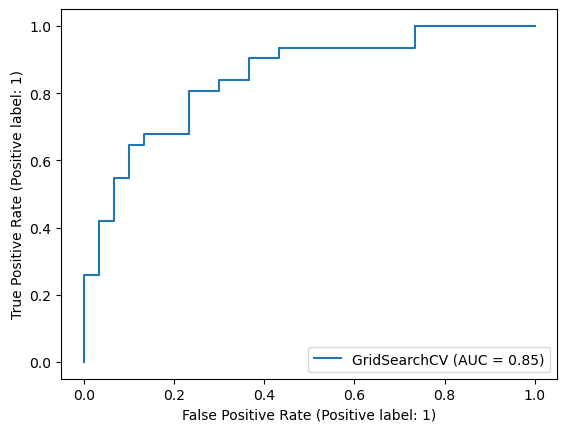

In [40]:
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [41]:
print(confusion_matrix(y_test,y_preds))

[[18 12]
 [ 3 28]]


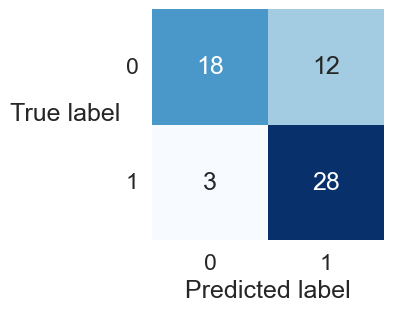

In [42]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False, cmap='Blues')
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    plt.xticks(rotation=0)  # Rotate x-axis labels
    plt.yticks(rotation=0)  # Rotate y-axis labels
    
    # Rotate the y-axis label
    plt.gca().yaxis.label.set_rotation(0)
    plt.gca().yaxis.label.set_ha('right') 
    
    
plot_conf_mat(y_test, y_preds)

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



## Calculate eval metrics using cross validation

In [44]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [45]:
# cretae new classifier with best params

clf=LogisticRegression(C= 0.38566204211634725, solver= "liblinear")

In [46]:
# cross validated accuracy
cv_acc=cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8380874316939891

In [47]:
# cross validated precision
cv_precision=cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8154667272314331

In [48]:
# cross validated recall
cv_recall=cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9151515151515153

In [49]:
# cross validated f1 score
cv_f1=cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8614850462777628

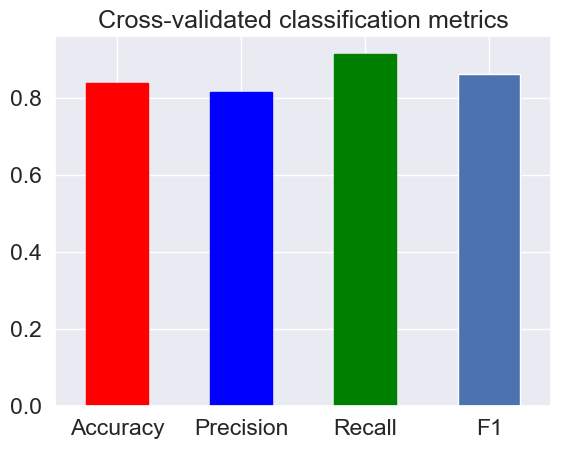

In [50]:

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

bars=cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);
plt.xticks(rotation=0) 
colors = ['red', 'blue', 'green']

# Plot the bar chart

# Set individual colors for each bar
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)
bars.legend().set_visible(False)

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [51]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [52]:
clf=LogisticRegression(C= 0.38566204211634725, solver= "liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [53]:
clf.coef_

array([[ 0.02197245, -1.18335586,  0.75710264, -0.02334337, -0.0017492 ,
         0.35581906,  0.35391417,  0.03440813, -0.70025879, -0.56110329,
         0.46102559, -0.61500844, -1.02087034]])

In [54]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.021972454368194002,
 'sex': -1.1833558587315585,
 'cp': 0.7571026395180247,
 'trestbps': -0.023343370350524695,
 'chol': -0.001749202997951869,
 'fbs': 0.3558190622294454,
 'restecg': 0.3539141682380141,
 'thalach': 0.03440813489900256,
 'exang': -0.7002587911225988,
 'oldpeak': -0.5611032882522904,
 'slope': 0.46102558561015866,
 'ca': -0.6150084442611897,
 'thal': -1.0208703385319642}

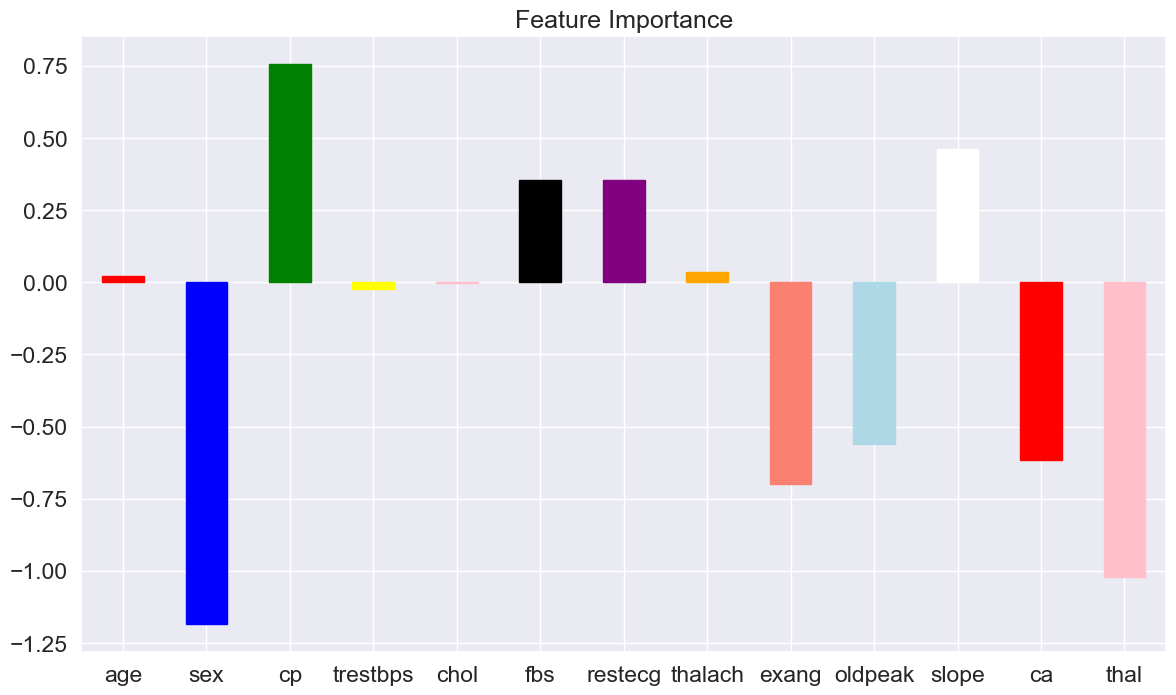

In [55]:
feature_df=pd.DataFrame(feature_dict,index=[0])
bars=feature_df.T.plot.bar(title="Feature Importance",legend=False,figsize=(14,8))
plt.xticks(rotation=0)  
colors = ['red', 'blue', 'green','yellow','pink','black','purple','orange','salmon','lightblue','white','red','pink']

# Plot the bar chart

# Set individual colors for each bar
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)
bars.legend().set_visible(False)
#contribution of each feature in detecting the heart disease

In [56]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [57]:
pd.crosstab(df["slope"], df["target"])


target,0,1
slope,,
0,12,9
1,91,49
2,35,107
